In [1]:
!pip install mne
import mne
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.8 MB/s eta 0:00:00


Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>
NOTE: pick_t

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<Info | 13 non-empty values
 bads: []
 ch_names: STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, ...
 chs: 9 Stimulus, 59 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 1.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>
319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
First 5 Events: [[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


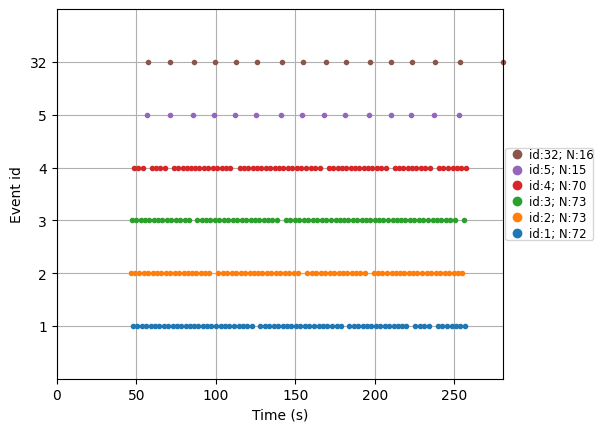

Not setting metadata
288 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 288 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 003', 'EE

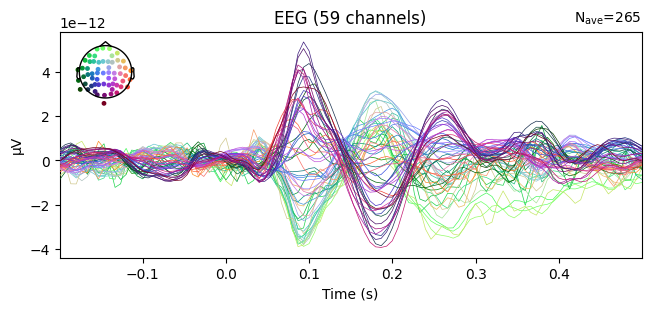

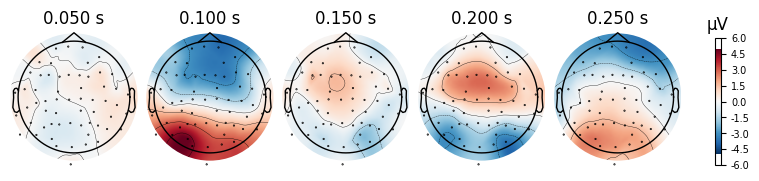

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.7s


Applying baseline correction (mode: logratio)


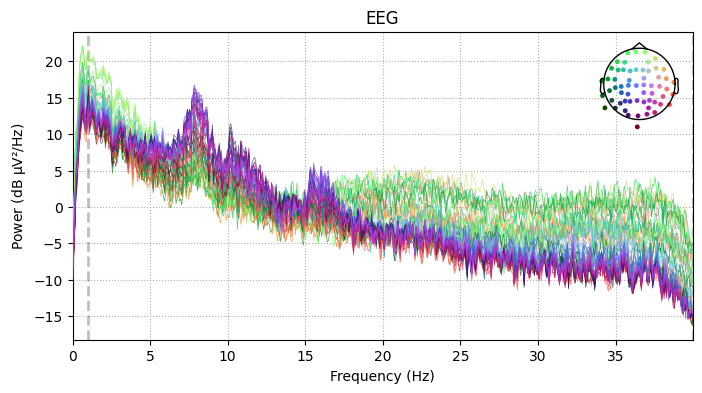

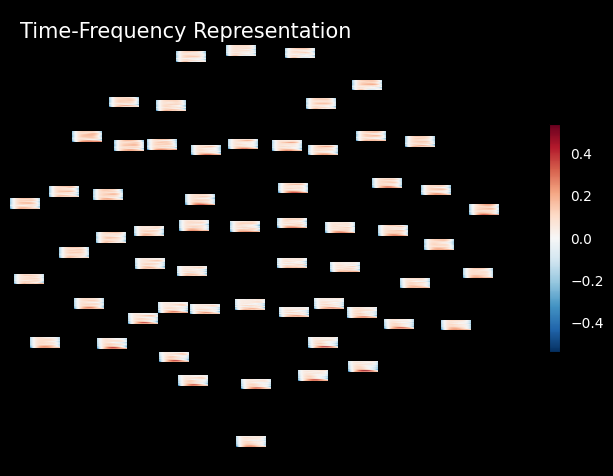

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# دانلود داده‌های EEG از دیتاست آماده MNE (یک مجموعه داده برای تست و تحلیل سیگنال مغزی)
data_path = mne.datasets.sample.data_path()
data_path = str(data_path)  # تبدیل مسیر به رشته (string) برای استفاده راحت‌تر

# مسیر فایل EEG که شامل سیگنال‌های خام مغزی هست
raw_file = data_path + "/MEG/sample/sample_audvis_filt-0-40_raw.fif"

# بارگذاری داده‌های خام EEG از فایل (preload=True یعنی همه رو از قبل داخل رم می‌ریزه)
raw = mne.io.read_raw_fif(raw_file, preload=True)
print(raw.info)  # چاپ اطلاعات کلی درباره داده‌های EEG

# انتخاب فقط کانال‌های EEG و Stim (محرک‌ها) و حذف داده‌های اضافه مثل MEG
raw.pick_types(meg=False, eeg=True, stim=True, eog=True)

# فیلتر کردن داده‌ها برای حذف نویزهای مزاحم (فقط فرکانس‌های بین 1 تا 40 هرتز رو نگه می‌داریم)
raw.filter(1, 40, fir_design='firwin')

# چاپ اطلاعات جدید بعد از فیلترگذاری
print(raw.info)

# پیدا کردن محرک‌هایی که در طول آزمایش به فرد داده شده (مثلاً تصاویر یا صداها)
events = mne.find_events(raw, stim_channel='STI 014')

# چاپ اولین ۵ محرک برای بررسی درست بودن داده‌ها
print("First 5 Events:", events[:5])

# تعریف نوع رویدادها و مقدار عددی هرکدوم
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2, 'Visual/Left': 3, 'Visual/Right': 4}

# رسم نمودار نمایش رویدادها
mne.viz.plot_events(events, raw.info['sfreq'])

# برش دادن سیگنال EEG به بخش‌های کوچیک (Epochs) بر اساس زمان رویدادها
tmin, tmax = -0.2, 0.5  # 200 میلی‌ثانیه قبل تا 500 میلی‌ثانیه بعد از هر رویداد
epochs = mne.Epochs(raw, events, event_id, tmin, tmax,
                    baseline=(None, 0),  # تنظیم سطح پایه سیگنال
                    reject=dict(eeg=100e-6),  # حذف بخش‌هایی که نویز شدید دارن
                    preload=True)

# محاسبه میانگین سیگنال EEG برای هر رویداد (ERP - پتانسیل مرتبط با رویداد)
evoked = epochs.average()

# نمایش نمودار سیگنال ERP برای همه کانال‌ها
evoked.plot(spatial_colors=True, scalings=dict(eeg=1e-6))

# رسم نقشه توپوگرافی سیگنال EEG در بازه‌های زمانی مختلف
# این نشون میده فعالیت مغز در نقاط مختلف سر چطور توی زمان‌های خاص تغییر می‌کنه
times = np.arange(0.05, 0.3, 0.05)  # زمان‌های 50 تا 300 میلی‌ثانیه بعد از رویداد
fig = evoked.plot_topomap(times, ch_type='eeg', time_unit='s', ncols=5, nrows=1)

# تحلیل فرکانسی (PSD) برای دیدن اینکه چه فرکانس‌هایی در EEG قوی‌تر هستن
fig, ax = plt.subplots(figsize=(8, 4))
raw.plot_psd(fmax=40, ax=ax)  # نمایش میزان توان فرکانس‌های EEG تا 40Hz

# تحلیل زمانی - فرکانسی برای بررسی تغییرات فرکانسی سیگنال در طول زمان
freqs = np.arange(1, 40, 2)  # بررسی فرکانس‌ها از 1Hz تا 40Hz با گام 2Hz
n_cycles = freqs / 2  # تعداد سیکل‌های هر فرکانس (برای تنظیم وضوح زمانی)
tfr = mne.time_frequency.tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, time_bandwidth=2.0, return_itc=False)

# نمایش نقشه زمانی-فرکانسی (نشان‌دهنده تغییرات فرکانسی در طول زمان)
tfr.plot_topo(baseline=(None, 0), mode='logratio', title='Time-Frequency Representation')

# اضافه کردن عنوان به نقشه‌های توپوگرافی
fig.suptitle('Topographic Maps', fontsize=14)

# نمایش همه نمودارها
plt.show()


### آموزش پایتون٬ماشین لرنینگ و کتابخونه های پایتون

**🧠 جدیدترین اخبار و پیشرفت‌های AI**

**🧠 آموزش‌های کاربردی از یادگیری ماشین تا دیپ لرنینگ**

**👨‍💻 پروژه‌های خلاقانه و پیاده‌سازی عملی با Python**

الگوریتم‌ها و توسعه مدل‌های زبانی


---


### **🎯 هوش مصنوعی رو یاد بگیر، اجرا کن و آینده رو بساز!**
**کانال ما :**‌

# 🔗 [@braindotpy ](https://t.me/braindotpy)